# CS-C3240 Machine Learning

## Assignment 4 - Model Validation and Selection

**submission deadline 11.02.2022 20:00 Helsinki time**

In the previous assignments, we simply trained and evaluated the models on all the data we had. However, the performance of a model on the **training set** of datapoints can be very misleading. In extreme cases, a complex model could even memorize the whole dataset, rendering it useless when presented with new data. What we care about in practice is the performance on a set of **unseen** datapoints, called the **validation set**, withheld from the model training. 

This process of evaluating the predictive capability of a ML model on the validation set is called **model validation**. It gives us a much better idea of the actual quality of the model, which we can then use to perform **model selection** - picking the best model for real world use.

## Learning goals
After successfully completing this assignment, you should: 
* Know why we need to split dataset into a **training and validation set**
* Be able to train a model on the **training set** then compute **validation error / accuracy**
* Know that validation can **be misleading** for small datasets
* Be able to use **k-fold CV** as an upgraded version of a single train/val split, to avoid an unlucky split (especially for small datasets)
* Know how to **select** between different models based on validation or average cross validation error/accuracy

In [2]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score    # function to calculate mean squared error 


## Underfitting V.S. Overfitting
Underfitting and overfitting are one of the most common ideas in Machine Learnig, essential for understanding why model validation is necessary. In case you have not seen it yet, you can find a demo notebook and a video of the presentation on the topic done by Yu in the Diagnosing ML lecture from Wed. 26.01. in [MyCourses](https://mycourses.aalto.fi/course/view.php?id=33626&section=2)

## Dataset for your task
We are going to reuse the dataset we have been working with in the previous assignments. The code below (up to the _'Student Task A4.1'_ section) loads and prepares the data and is exactly the same as in task _A2.1_.

In [3]:
# Read in the data stored in the file 'FMIData_Assignment4.csv'
df = pd.read_csv('FMIData_Assignment4.csv')
df.drop(columns=['Time zone','Precipitation amount (mm)','Snow depth (cm)','Air temperature (degC)',\
                 'Ground minimum temperature (degC)'],inplace=True)  # drop unrelevant columns
df.columns =['year','m','d','time','max temperature','min temperature'] # rename columns 

# Print the first 5 rows of the DataFrame 'df'
df.head(5)

,year,m,d,time,max temperature,min temperature
0,2020,1,1,00:00,3.4,-2.6
1,2020,1,1,06:00,NaN,NaN
2,2020,1,2,00:00,5.1,1.8
3,2020,1,2,06:00,NaN,NaN
4,2020,1,3,00:00,5.7,4.3


In [4]:
# Select only weather recordings whose property 'time' is equal to `00:00`
FMIRawData = df[df['time'] == '00:00']

# Create the feature and label vectors
X = FMIRawData['min temperature'].to_numpy().reshape(-1, 1)
y = FMIRawData['max temperature'].to_numpy()

<div class=" alert alert-warning">

# Student Task A4.1: Generate Training set and Validation Set.
   
YOUR TASK is to use the function <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split()</a> provided by Scikit-learn's `model_selection` module to split the dataset into a training and validation set. 

This function takes as input the original feature matrix `X` and label vector `y` and outputs the feature matrices and label vectors of the training- and validation sets in the order `X_train, X_val, y_train, y_val`. Moreover, the function takes additional input parameters that specify how the data should be split. In this case, you should set the parameters `test_size=0.33` and `random_state=42`. The parameter `test_size` indicates the proportion of the dataset that is used as the validation(/test) set,please set it to`test_size=0.33`
    
</div>

In [5]:
from sklearn.model_selection import train_test_split 


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, random_state=42)

In [6]:
# Sanity check the percentage of the validation data up to 1%
assert np.isclose(0.33, X_val.shape[0] / X.shape[0], atol=0.01)

In [7]:
# this test cell is for A4.1


Here we create the `y_..._train, y_..._val` label vectors for the binary and multilass classification versions of the temperature problem, similarly to the code preparing _A3.1_ and _A3.4_. We will use the `X_train, X_val` feature matrices for regression and both of the classification tasks.

## Models for your task
We will use the models we trained previously - Polynomial regressors from Assignment 2, and Logistic regressors from Assignment 3. The code for training them is copied directly from _A2.3_ and _A3.1_, with gaps left for calculating the validation results.   

<div class=" alert alert-warning">

# Student Task A4.2: 
    
Fill the below code training Polynomial regression models to also report train and validation errors. Use the [mean_squared_error()](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) function, same as in Assignment 2
   
</div>

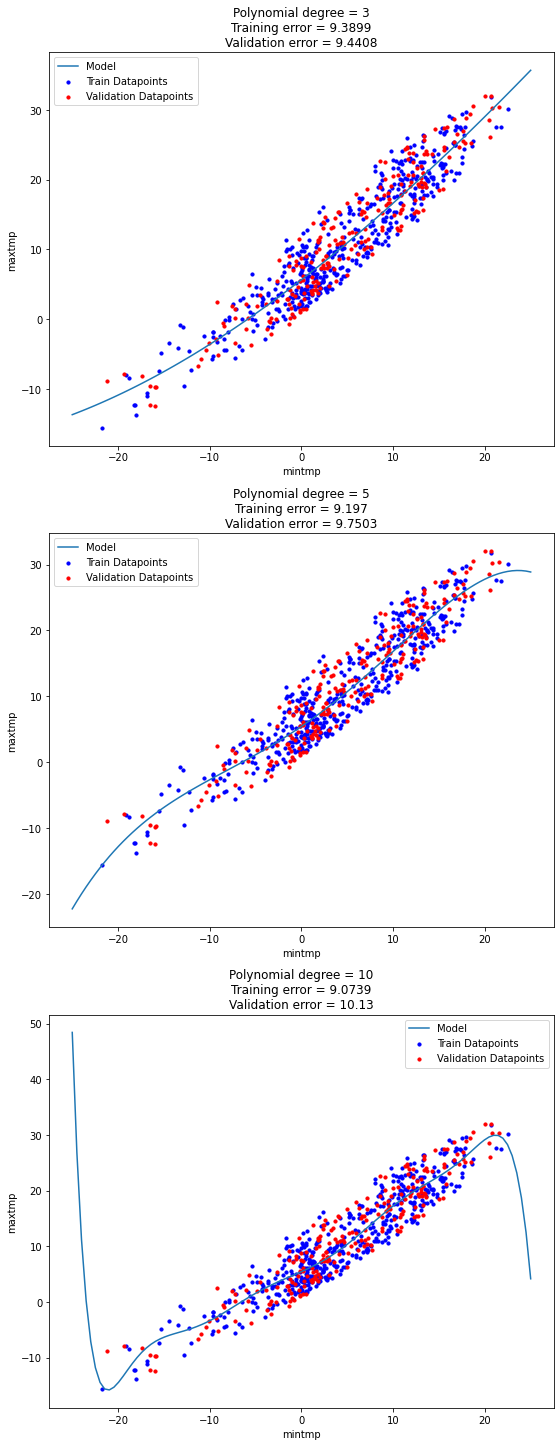

In [48]:
## define a list of values for the maximum polynomial degree 
degrees = [3, 5, 10]    

# we will use this variable to store the resulting training errors for each polynomial degree
tr_errors = []          
val_errors = []

plt.figure(figsize=(8, 20))    # create a new figure with size 8*20
for i, degree in enumerate(degrees):    # use for-loop to fit polynomial regression models with different degrees, i stores index starting from 0, degree stores current item from degrees list
    plt.subplot(len(degrees), 1, i + 1)    # choose the subplot
    
    poly = PolynomialFeatures(degree=degree)    # generate polynomial features
    X_train_poly = poly.fit_transform(X_train)    # fit and transform the raw features
    
    lin_regr = LinearRegression(fit_intercept=False) 
    lin_regr.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels
    
    y_pred_train = lin_regr.predict(X_train_poly)    # predict values for the training data using the linear model
    tr_error = mean_squared_error(y_train,y_pred_train)        # calculate the training error
    
    X_val_poly = poly.transform(X_val)   # transform the raw features for the validation data 
    #lin_regr.fit(X_val_poly,y_val)
    
    y_pred_val = lin_regr.predict(X_val_poly)      # predict values for the validation data using the linear model 
    val_error = mean_squared_error(y_val,y_pred_val) # calculate the validation error
    
    # sanity check the feature matrix is transformed correctly
    assert X_val_poly.shape == (X_val.shape[0], degree + 1), "The dimension of new feature vector is incorrect" 
    # sanity check the error values
    assert 8 < tr_error < 12 and 8 < val_error < 12
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    X_fit = np.linspace(-25, 25, 100)    # generate samples
    plt.tight_layout()
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
    plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
    plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
    plt.xlabel('mintmp')    # set the label for the x/y-axis
    plt.ylabel('maxtmp')
    plt.legend(loc="best")    # set the location of the legend
    plt.title(f'Polynomial degree = {degree}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
plt.show()    # show the plot

# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

In [49]:
# this test cell is for A4.2
### BEGIN HIDDEN TESTS
tr_errors_test = []
val_errors_test = []
for i in range(len(degrees)): 
    poly_test = PolynomialFeatures(degree=degrees[i])
    X_train_poly_test = poly_test.fit_transform(X_train)
    
    lin_regr_test = LinearRegression(fit_intercept=False)
    lin_regr_test.fit(X_train_poly_test, y_train)

    y_pred_test = lin_regr_test.predict(X_train_poly_test)
    tr_error_test = mean_squared_error(y_train, y_pred_test) 
    tr_errors_test.append(tr_error_test)
    
    X_val_poly_test = poly_test.transform(X_val) 
    y_pred_val_test = lin_regr_test.predict(X_val_poly_test) 
    val_error_test = mean_squared_error(y_val, y_pred_val_test) 
    val_errors_test.append(val_error_test)

assert np.isclose(np.array(tr_errors_test),np.array(tr_errors), rtol=0.001).all(), 'The training errors are not correct!'
assert np.isclose(np.array(val_errors_test),np.array(val_errors), rtol=0.001).all(), 'The validation errors are not correct!'

### END HIDDEN TESTS

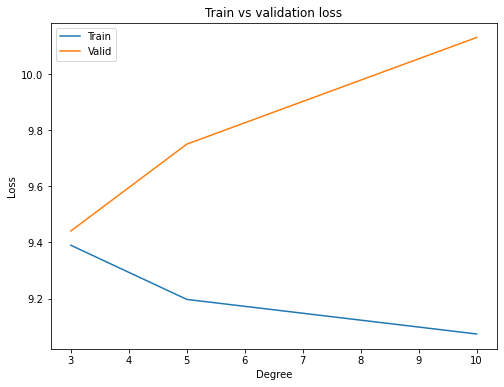

In [50]:
plt.figure(figsize=(8, 6))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [10]:
# this test cell is for A4.2


In [11]:
# this test cell is for A4.2

<div class=" alert alert-warning">

# Student Task A4.3 

Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: Which of the models from A4.2 would you recommend based on the validation error?
- Answer 1: Degree 3 
- Answer 2: Degree 5
- Answer 3: Degree 10

Question 2: Which of the models from A4.2 seems to overfit the data the most?
- Answer 1: Degree 3 
- Answer 2: Degree 5
- Answer 3: Degree 10
- Answer 4: None
</div>

In [12]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1 = 2 

## set Answer_Q2 to the index of the correct answer for Question 2 
# (e.g., write "Answer_Q2=1" if you think Answer 1 is correct)

Answer_Q2 = 3   


In [13]:
# sanity check datatype of Answer_Q1
assert isinstance(Answer_Q1, int), "Please use datatype 'int' for your answer"
assert isinstance(Answer_Q2, int), "Please use datatype 'int' for your answer"

In [14]:
# this cell is for tests for A4.3

In [15]:
# this cell is for tests for A4.3

<div class=" alert alert-warning">

# Student Task A4.4
Train two different classifiers and evaluate them on both training set and validation set:
    
    
* By minimising different losses, **logistic loss** and **hinge loss**, find the optimal hypothesis function $h(x)$ from the same hypothesis space, in particular, the span of a set of linear maps we have been repeatedly using for our previous assignments.
    
   Sklearn classes [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) provides the methods you need to complete model training and label predicting.
    

* Calculate the train and validation accuracy (average **0/1 loss**) for both models. The function [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) has been imported for you in the beginning of this notebook.

We will use a subset from the dataset you have seen in A3, for each datapoint, the feature is min temperature at 00:00, the label is the corresponding binarized max temperature at 00:00.
</div>

In [16]:
minvalue = FMIRawData['max temperature'].min() # minimum of the column 'max temperature'
maxvalue = FMIRawData['max temperature'].max() # maximum of the column 'max temperature'
    
bi_labels = [0,1] # new labels to be assigned
bi_cut_bins = [minvalue,0,maxvalue] #cutting intervals/criteria

# encode max temperatures (label) to binary labels
y_clf = pd.cut(y, bins=bi_cut_bins,labels=bi_labels,include_lowest=True).to_numpy()

# features remain same, but assign different variable name to make the names more consistent
X_clf = np.copy(X)

# Select a subset and split data into training set and validation set, NOTE: variable names are different from last task
np.random.seed(42)
idx = np.random.choice(np.arange(713),200) # choose 200 datapoints

# Variable names: X_clf_train, X_clf_val, y_clf_train, y_clf_val are used for this classification task
X_clf_train, X_clf_val, y_clf_train, y_clf_val = train_test_split(X_clf[idx,:], y_clf[idx], test_size=0.33, random_state=42)

In [17]:
# C is the inverse of regularization strength, use a very large C to greatly weaken regularization strength
# Use "linear" kernal for SVC to avoid non-linear transformation to features
c = 100000 

clf_1 = LogisticRegression(C=c)              # initialise a LogisticRegression classifier
clf_2 = SVC(C=c,kernel="linear")             # initialise a SVC classifier

clfs = [clf_1,clf_2]                         # list of classifiers
clf_names = ["LogisticRegression","SVC"]     # list of classifier names

In [18]:
tr_accs = {} # create a dictionary to store training accuracies for both models, clf_names will be used as keys
val_accs = {} # create a dictionary to store validation accuracies for both models, clf_names will be used as keys 
for i, clf in enumerate(clfs):
    print(f"classifier {i+1} is: ",clf_names[i]) # use a for loop to go through both of the classification methods.
    
    ## Train the models and calculate both training accuracies and validation accuracies
    
    # Note:Logistic regression and SVC only has fit() and predict() methods, does not have transform methods.
    clf.fit(X_clf_train,y_clf_train) # train the model on training set, NOTE: valriable names are different from last task
    
    y_pred_train = clf.predict(X_clf_train) # predict the labels of training set
    acc_train = mean_squared_error(y_clf_train,y_pred_train) # calculate the training accuracy
    tr_accs[clf_names[i]] = accuracy_score(y_clf_train, y_pred_train) # add the training accuracy to the dict
    
    y_pred_val = clf.predict(X_clf_val) # predict the labels of validation set
    acc_val =  mean_squared_error(y_clf_val,y_pred_val)  # calculate the validation accuracy
    val_accs[clf_names[i]] = accuracy_score(y_clf_val, y_pred_val)  # add the validation accuracy to the dict  

print("\ntraining accuracies:\n",tr_accs)
print('\n') # what is this?
print("validation accuracies:\n",val_accs)

## sanity check
assert 0.6 < clf_1.coef_ <0.7, "Incorrect map"
assert (np.fromiter(tr_accs.values(),dtype=float) > 0.92).all(), "accuracies on training set are incorrect"

classifier 1 is:  LogisticRegression
classifier 2 is:  SVC

training accuracies:
 {'LogisticRegression': 0.9402985074626866, 'SVC': 0.9552238805970149}


validation accuracies:
 {'LogisticRegression': 0.9393939393939394, 'SVC': 0.9242424242424242}


In [19]:
# this test cell is for A4.4


In [20]:
# this test cell is for A4.4


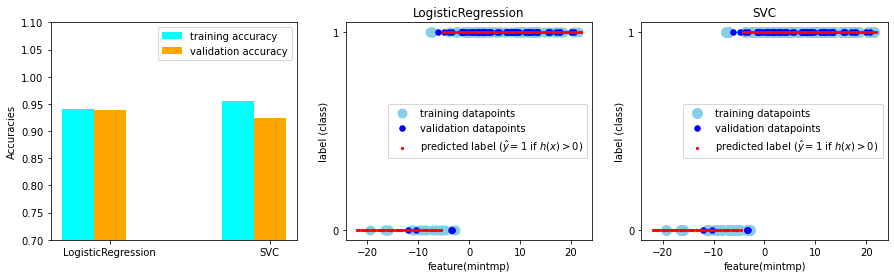

In [21]:
# plot results
fig, axes = plt.subplots(1,3,figsize=(15,4))
x = np.arange(2)
y1 = list(tr_accs.values())
y2 = list(val_accs.values())
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_ylim(0.7, 1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["LogisticRegression","SVC"])
axes[0].set_ylabel("Accuracies")
axes[0].legend(["training accuracy", "validation accuracy"])

X_fit = np.linspace(-22, 22, 100)

axes[1].set_xlabel("feature(mintmp)")
axes[1].set_yticks([0,1])
axes[1].set_ylabel('label (class)')
axes[1].set_title("LogisticRegression")
axes[1].scatter(X_clf_train[:,0],y_clf_train,s=80,c="skyblue",label="training datapoints")
axes[1].scatter(X_clf_val[:,0],y_clf_val,s=30,c="blue",label="validation datapoints")
axes[1].scatter(X_fit, clf_1.predict(X_fit.reshape(-1, 1)),color='r',s=5,label='predicted label ($\hat{y}=1$ if $h(x) > 0$)') 
axes[1].legend()

axes[2].set_xlabel("feature(mintmp)")
axes[2].set_yticks([0,1])
axes[2].set_ylabel('label (class)')
axes[2].set_title("SVC")
axes[2].scatter(X_clf_train[:,0],y_clf_train,s=100,c="skyblue",label="training datapoints")
axes[2].scatter(X_clf_val[:,0],y_clf_val,s=30,c="blue",label="validation datapoints")
axes[2].scatter(X_fit, clf_2.predict(X_fit.reshape(-1, 1)),color='r',s=5,label='predicted label ($\hat{y}=1$ if $h(x) > 0$)') 
axes[2].legend()
plt.show()

<div class=" alert alert-warning">

# Student Task A4.5

Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: Which of the following statements is correct?
- Answer 1: The hypothesis spaces for LogisticRegression and SVC are different.
- Answer 2: The loss functions used by LogisticRegression and SVC are different.
    
Question 2 : Which of the classifiers from A4.4 would you select?
- Answer 1: Classifier 1, LogisticRegression model
- Answer 2: Classifier 2, SVC model

</div>

In [22]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1 = 1
Answer_Q2 = 1


In [23]:
# sanity check datatype of Answer_Q1
assert isinstance(Answer_Q1, int), "Please use datatype 'int' for your answer"
assert isinstance(Answer_Q2, int), "Please use datatype 'int' for your answer"

In [24]:
# this is the first test cell for A4.5

In [25]:
# this is the second test cell for A4.5

# Cross validation demo

The training-validation division we introduced so far is alreday much better than making decisions based solely on the training loss or accuracy, which as we have seen can be deceiving. However, sometimes the dataset we are using is so diverse, that the small, randomly selected validation set might not capture its difficulty properly.

Instead of deciding which model is best by looking only at a small portion of the data - the validation set, we can run the training multiple times. Each time we would use a different part of the dataset, so that each datapoint ends up in the validation set (withheld from the training) once, and then calculate the average results. K-fold Cross Validation is a technique allowing us to do that, and is described in the following figure: 

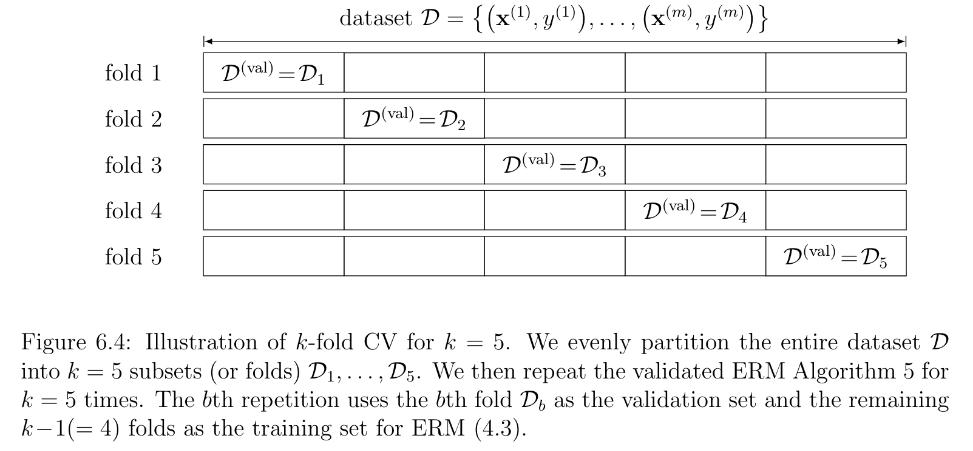

Note that when using K-fold CV, we have to run the training K times - which is fine for the regression models we have been using so far, but usually infeasible for more complex ML methods which take a long time to train, such as Neural Networks.
For more explanation, see the [Machine Learning Book](http://mlbook.cs.aalto.fi/), chapter 6.2.2


In [26]:
from sklearn.model_selection import KFold

In [27]:
# Defining the kfold object we will use for cross validation
k, shuffle, seed = 3, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)

The code below is largly the same as in A4.2, but note that we now use the kfold indices instead of the previous train test split, and we have multiple (`k`, to be precise) iterations per degree.

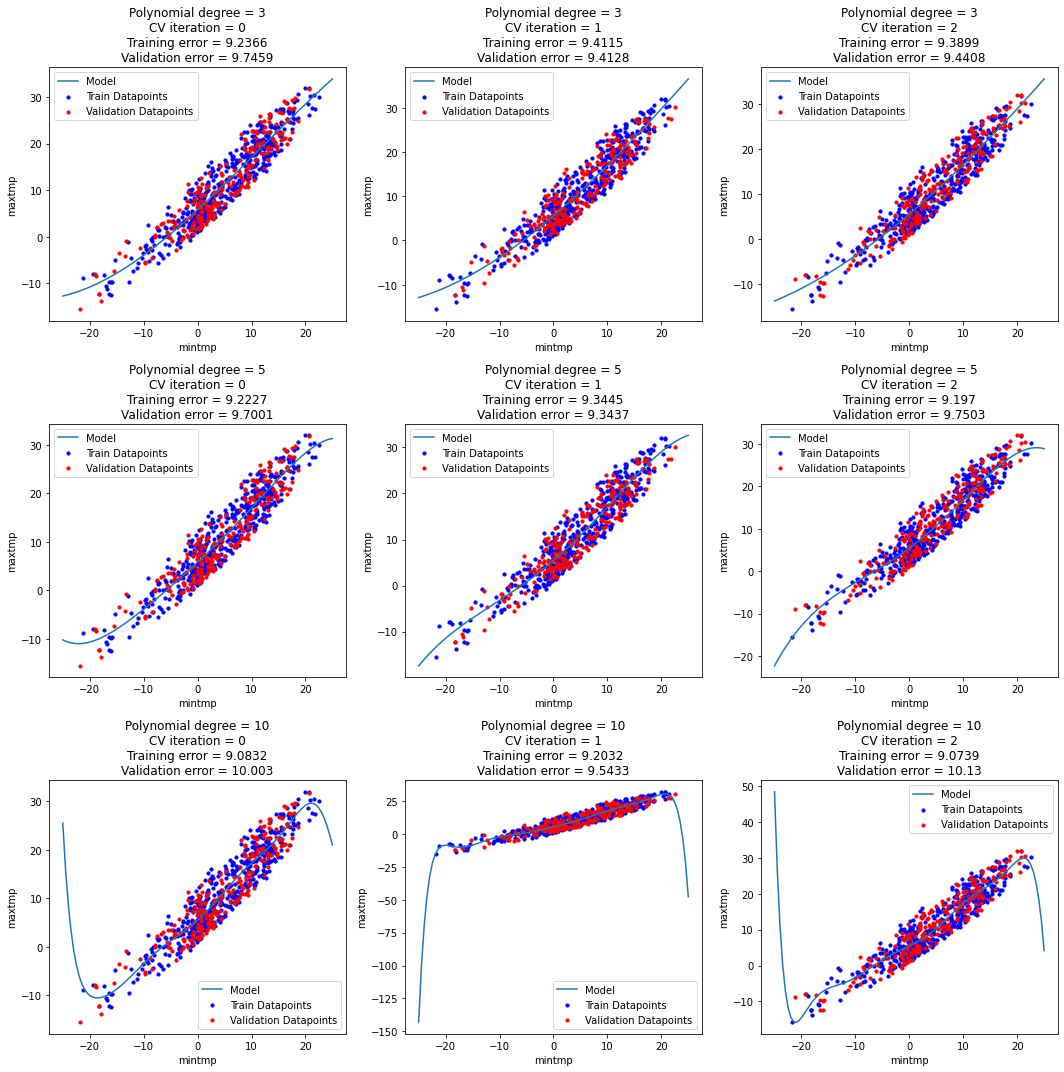

In [28]:
## define a list of values for the maximum polynomial degree 
degrees = [3, 5, 10]    

# we will use this variables to store the resulting training/validation errors for each polynomial degree 
# NB - this time we have multiple errors (for each CV step) for each degree, so we store the errors in a dictionary
tr_errors = {}          
val_errors = {}

plt.figure(figsize=(15, 15))    # create a new figure with size 8*20
for i, degree in enumerate(degrees):    # use for-loop to fit polynomial regression models with different degrees
    tr_errors[degree] = [] # NB - now we will have k different errors per degree
    val_errors[degree] = []
    
    # We use the kfold object created earlier, to obtain train and validation sets 
    # for k iterations of training and evaluation
    for j, (train_indices, val_indices) in enumerate(kfold.split(X)): 
        plt.subplot(len(degrees), k, i * k + j + 1)   # choose the subplot

        # Define the training and validation data using the indices returned by kfold and numpy indexing 
        
        X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]
        
        lin_regr = LinearRegression(fit_intercept=False) # NOTE: "fit_intercept=False" as we already have a constant iterm in the new feature X_poly
        poly = PolynomialFeatures(degree=degree)    # generate polynomial features
        X_train_poly = poly.fit_transform(X_train)    # fit the raw features
        lin_regr.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels

        # Now we compute the errors on train and validation data obtained from kfold
        y_pred_train = lin_regr.predict(X_train_poly)    # predict using the linear model
        tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
        X_val_poly = poly.transform(X_val) # fit the raw features for the validation data 
        y_pred_val = lin_regr.predict(X_val_poly) # predict labels for the validation data using the linear model 
        val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
        
        tr_errors[degree].append(tr_error) # # NB - We save all the errors to analyze later
        val_errors[degree].append(val_error)
        X_fit = np.linspace(-25, 25, 100)    # generate samples
        plt.tight_layout()
        plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
        plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
        plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
        plt.xlabel('mintmp')    # set the label for the x/y-axis
        plt.ylabel('maxtmp')
        plt.legend(loc="best")    # set the location of the legend
        plt.title(f'Polynomial degree = {degree}\nCV iteration = {j}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title


plt.show()    # show the plot

In [29]:
tr_errors, val_errors

({3: [9.236556170168834, 9.411462738283884, 9.389916541695836],
  5: [9.22272765780749, 9.3444513570306, 9.197023347462315],
  10: [9.08319099376636, 9.203216843274802, 9.073863924656623]},
 {3: [9.745894623717183, 9.412784222037379, 9.44077023521205],
  5: [9.700140592066978, 9.343675059014465, 9.750313844418306],
  10: [10.003086223156133, 9.543335313534987, 10.130383217491586]})

In [30]:
average_train_error, average_val_error = {}, {}
for degree in degrees:
    # Now we calculate the average train and validation errors for each polynomial degree
    average_train_error[degree] = np.mean(tr_errors[degree])
    average_val_error[degree] = np.mean(val_errors[degree])
   
    print(f"Degree {degree}, avg train error = {average_train_error[degree]:.5f}, "
          f"avg val error = {average_val_error[degree]:.5f}")

Degree 3, avg train error = 9.34598, avg val error = 9.53315
Degree 5, avg train error = 9.25473, avg val error = 9.59804
Degree 10, avg train error = 9.12009, avg val error = 9.89227


<div class=" alert alert-warning">

# Student Task A4.6

Answer the following quiz question by setting the corresponding variable to the index of the answer that you consider correct. For answering question 1, read through the Cross Valdation demo above.

Question 1: Based on the K-fold CV average validation errors, which model would you recommend?
- Answer 1: Degree 3 
- Answer 2: Degree 5
- Answer 3: Degree 10
    
Question 2: Is it possible for a model to have a lower accuracy on the train set than on the validation set, for any dataset?
- Answer 1: Yes
- Answer 2: No

</div>

In [31]:
## set Answer_Q1 and Answer_Q2 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)

Answer_Q1  = 1
Answer_Q2 = 1


In [32]:
# sanity check datatype 
assert isinstance(Answer_Q1, int), "Please use datatype 'int' for your answer"
assert isinstance(Answer_Q2, int), "Please use datatype 'int' for your answer"

In [33]:
# this is test cell for A4.6

In [34]:
# this is test cell for A4.6